<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-I/blob/main/Experimento_de_Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analiticamente
###Experimento de Buffon

Si tenemos un plano con infinitas rectas paralelas con una distancia $d$ de separacion y lanzamos una aguja de longitud $k< d$, ¿cual es la probabilidad de que una aguja caiga sobre una de las rectas?

Sea $x$ la distancia media entre el punto medio de la aguja y la recta a cortar.

Asi $x$ tiene el siguiente dominio:

$$0\leq x\leq \frac{d}{2}$$

Ahora definimos $θ$ como el ángulo que se toma entre la aguja y la recta:

Asi $θ$ tiene el siguiente dominio:
$$0\leq θ\leq \frac{\pi}{2}$$


Definimos la función de densidad para ambas variables continuas y distribuidas uniformemente:
$$f_θ(θ)=\frac{2}{\pi}$$

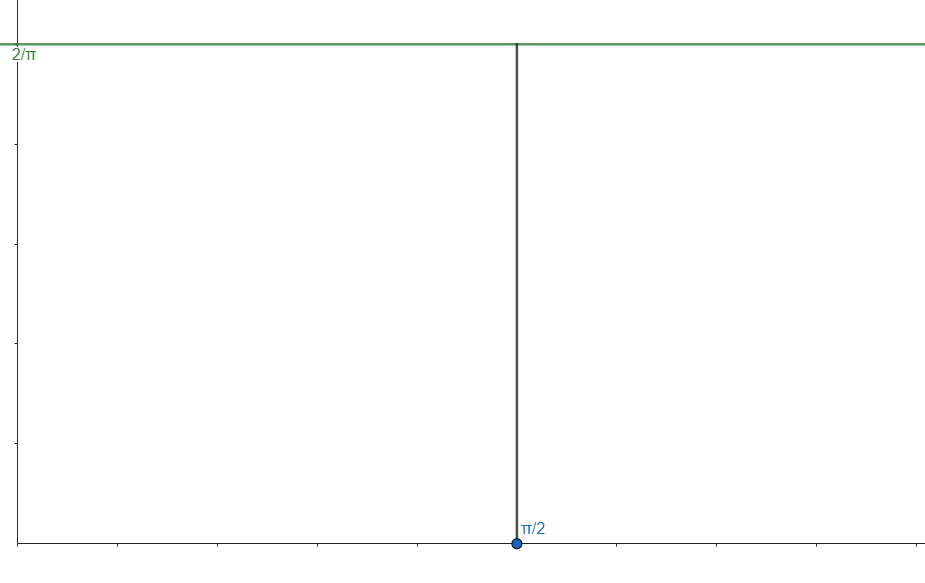

$$f_x(x)=\frac{2}{d}$$


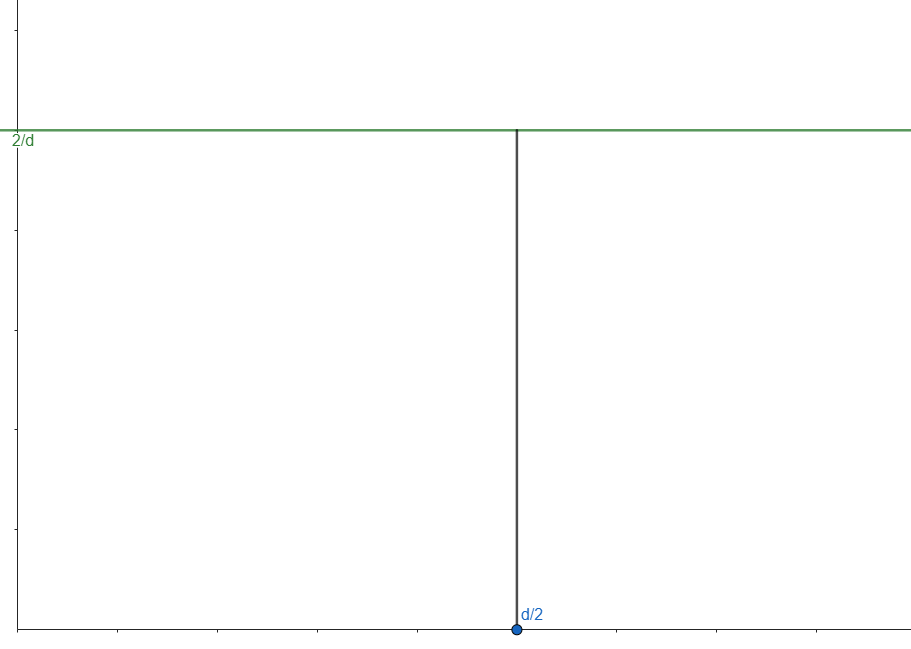

Dado que $θ$ y $x$ son variables aleatorias independientes por propiedad de eventos independientes calculamos la función de distribución conjunta:

Sabemos que:
$$f_{y ,x}(y,x )=f_{y|x}(y|x)f_{x}(x)=\frac{f_{yx}(yx)}{f_{x}(x)}=f_{y}(y)f_{x}(x)
\quad \therefore \quad f_{x, \theta}(x,\theta )=f_{x}(x)f_{\theta}(\theta)$$

Asi:

$$f_{x,\theta}(x,\theta )=(\frac{2}{d})(\frac{2}{\pi})=\frac{4}{\pi d}$$


$x$ puede tomar valores entre $[0,\frac{d}{2}]$ pero no todos los valores dentro del dominio cortarán la recta.
Definiremos esos valores de $x$ que cortan la recta:
Se puede notar que la distancia media de la aguja junto con $θ$ proyectan la siguiente recta con distancia:

$$d'=\frac{k}{2}sen(θ)$$

Presentandose dos casos:

- Si $\frac{k}{2}sen(θ)< x$,  la aguja no corta la recta
- Si $\frac{k}{2}sen(θ)> x$,  la aguja corta la recta

Por lo tanto tenemos la siguiente condicion:

La aguja corta la recta si:
$$0\leq x \leq \frac{k}{2}sen(θ) $$

Asi podemos calcular la probabilidad que se nos pide como sigue:

$$P((x,θ)\in A)=\int \int_{A}f(u,v)dudv=\int_{a}^{b}\int_{c}^{d}f(u,v)dudv=\int_{0}^{\frac{\pi}{2}}\int_{0}^{\frac{k}{2}sen(\theta)}f(x,\theta)dxd\theta$$

$$=\int_{0}^{\frac{\pi}{2}}\int_{0}^{\frac{k}{2}sen(\theta)} \frac{4}{\pi d}dxd\theta=P(ρ)$$

$$P(ρ)=\frac{2k}{\pi d}$$

Si $k=d$, se tiene que la probabilidad de que una aguja corte la recta es de $\frac{2}{\pi}$

Si definimos $N$ como el numero de lanzamientos y $n$ como el numero de casos favorables se tiene que:

$$\frac{2}{\pi}≈\frac{n}{N}$$
$$\hat{\pi}≈\frac{2N}{n}$$

Caso contrario:
$$\hat{\pi}≈\frac{2kN}{dn}$$

#Por simulacion

In [235]:
import numpy as np
import matplotlib.pyplot as plt

In [236]:
N=1000
d=100
k=100

In [237]:
def estimacion(N,k,d):  #Generamos una muestra
    l=[]
    exitos=0
    for i in range(N):
        u1=np.random.uniform(0,np.pi/2)
        u2=np.random.uniform(0,d/2)
        if 0<=u2<=(k/2)*(np.sin(u1)): #funcion de una cuarta parte de un circulo
            exitos+=1
        prob=exitos/(i+1)
        if prob!=0:             #Calculo de la probabilidad del evento
          l.append((2*k/d)*(1/prob))

    return l

Media:  3.0786185309798273
Error estandar de la media:  0.1383221109392332


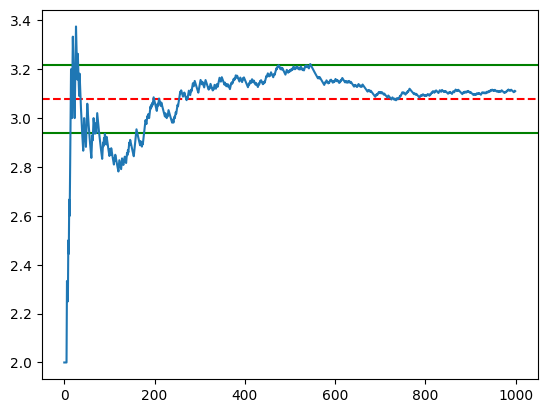

In [238]:
G=estimacion(N,k,d)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media

print("Media: ", media)
print("Error estandar de la media: ", desv)

#Graficamos un intervalo de confianza de un error estandar
plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()

¿Cual valor de $N$ elegir?
Se ve que una muestra $N\approx 600$ da un resutado aceptable.

Ademas para modificar la funcion y convertirla en una corrida de la simulacion: $l\rightarrow l[-1]$ y fijamos N=600. Por ejemplo:

In [242]:
N=600

In [243]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimacion(N,k,d)
    r.append(R[-1])
  return r

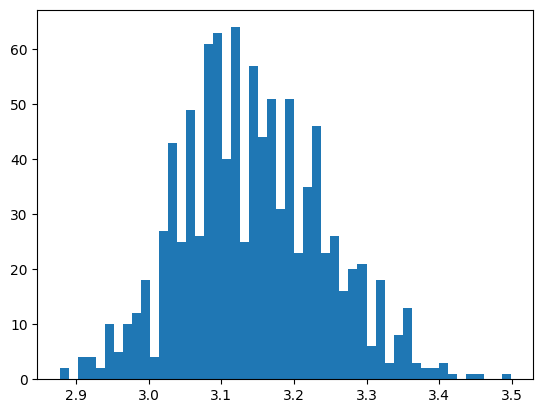

In [244]:
S=simulacion(1000)
plt.hist(S, bins=50)
plt.show()